In [ ]:
import pandas as pd 
import numpy as np 
from IPython.display import Audio
import pickle
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

In [20]:
# Pickle dosyasından veriyi yükle
with open('padded_data_labels.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Yüklenen veriyi DataFrame olarak kullanma
padded_data = loaded_data['Padded_Data']
labels = loaded_data['Labels']
file_names = loaded_data['File_Name']

print("Pickle dosyasından veri başarıyla yüklendi.")


Pickle dosyasından veri başarıyla yüklendi.


In [22]:
hepsi_df=pd.DataFrame(loaded_data)

In [24]:
hepsi_df

,Padded_Data,Labels,File_Name
0,"[-0.13182852, -0.14510787, -0.003021273, 0.085...",1,B_S2_D1_133-bebop_000_.wav
1,"[0.084993385, 0.041818485, -0.030503359, -0.03...",1,B_S2_D1_088-bebop_004_.wav
2,"[0.00076761027, 0.017137064, 0.01910391, -0.03...",1,B_S2_D1_115-bebop_004_.wav
3,"[-0.023073137, 0.024521964, 0.07881488, 0.0558...",1,B_S2_D1_116-bebop_004_.wav
4,"[0.09181445, 0.030784324, -0.028941356, -0.016...",1,B_S2_D1_076-bebop_004_.wav
...,...,...,...
2063,"[-0.0017295582, 0.00580514, 0.015104758, 0.022...",4,jackal_reverbed17.wav
2064,"[-0.020374442, -0.023320988, -0.0066952184, 0....",4,jackal_reverbed19.wav
2065,"[0.006862265, 0.004533185, -9.205535e-05, 0.00...",4,jackal_reverbed2.wav
2066,"[0.14210652, 0.23971367, 0.20274945, 0.4468968...",4,jackal_noisy_x82.wav


In [25]:
data = np.stack(hepsi_df["Padded_Data"].to_numpy())
labels = hepsi_df["Labels"].to_numpy()

def extract_features(audio_data, sample_rate=22050, n_mfcc=40):
    features = []
    for signal in audio_data:

        mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_var = np.var(mfcc, axis=1)
        
        
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=signal, sr=sample_rate))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate))
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=signal, sr=sample_rate))
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=signal))
        
        feature_vector = np.hstack([
            mfcc_mean, mfcc_var, spectral_centroid, spectral_bandwidth, spectral_rolloff, zero_crossing_rate
        ])
        features.append(feature_vector)
    
    return np.array(features)

features = extract_features(data, sample_rate=22050)
print(f"Feature shape: {features.shape}")

Feature shape: (2068, 84)


# RANDOM FOREST

In [29]:
labels = labels.astype(int)  
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.95      0.97      0.96       137
           2       1.00      0.65      0.79        26
           3       0.97      0.95      0.96       134
           4       0.88      1.00      0.94       101

    accuracy                           0.94       414
   macro avg       0.96      0.85      0.89       414
weighted avg       0.94      0.94      0.94       414



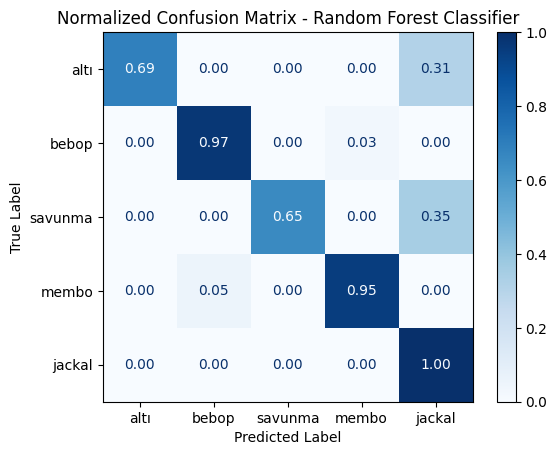

In [ ]:
labels = labels.astype(int)  
label_names = ["altı", "bebop", "savunma", "membo", "jackal"]
conf_matrix = confusion_matrix(y_test, rf_predictions, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues, values_format='.2f') 
plt.title("Normalized Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# SVM

SVM Classification Report:
              precision    recall  f1-score   support

        altı       0.00      0.00      0.00        16
       bebop       0.49      0.91      0.64       137
     savunma       0.00      0.00      0.00        26
       membo       0.66      0.34      0.45       134
      jackal       0.74      0.66      0.70       101

    accuracy                           0.57       414
   macro avg       0.38      0.38      0.36       414
weighted avg       0.56      0.57      0.53       414



c:\Users\ninja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ninja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ninja\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

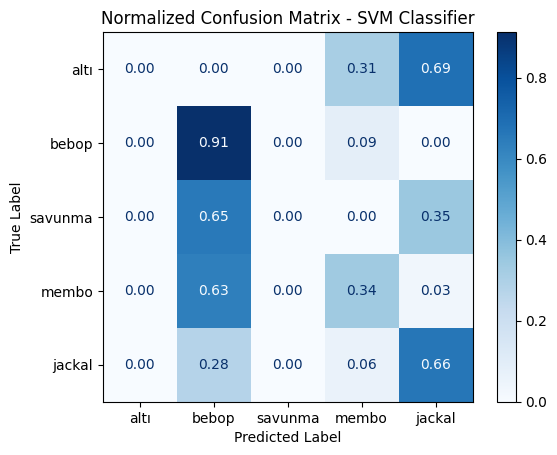

In [32]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions, target_names=label_names))
conf_matrix = confusion_matrix(y_test, svm_predictions, normalize='true')


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues, values_format='.2f') 
plt.title("Normalized Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()